In [157]:
NAME = "Syeda Abeera Amir"
COLLABORATORS = ""

---

# CS110 Assignment 3 - Trie trees

**Fell free to add more cells to the ones always provided in each question to expand your answers, as needed. Make sure to refer to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?pli=1) on the grading guidelines, namely how many HC identifications and applications you are expected to include in each assignment.**

If you have any questions, do not hesitate to reach out to the TAs in the Slack channel "#cs110-algo", or come to one of your instructors' OHs.

### Submission Materials
Your assignment submission needs to include the following resources:
1. A PDF file must be the first resource and it will be created from the Jupyter notebook template provided in these instructions. Please make sure to use the same function names as the ones provided in the template. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”.
2. Your second resource must be a single Python/Jupyter Notebook named “Dumbledore.ipynb”. You can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (if your name is Dumbledore!).

For details on how to create a nice PDF from a Jupyter notebook, refer again to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?pli=1).

### HCs and LOs for this assignment
[#responsibility], [#PythonProgramming], [#CodeReadability], [#DataStructures], [#ComplexityAnalysis], [#ComputationalCritique]

## Question 0

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to the end of week 10 (inclusively).

This will be evidence that you have submitted acceptable pre-class and make-up work
for a CS110 session you may have missed. Check the specific CS110 make-up and
pre-class policies in the syllabus of the course.

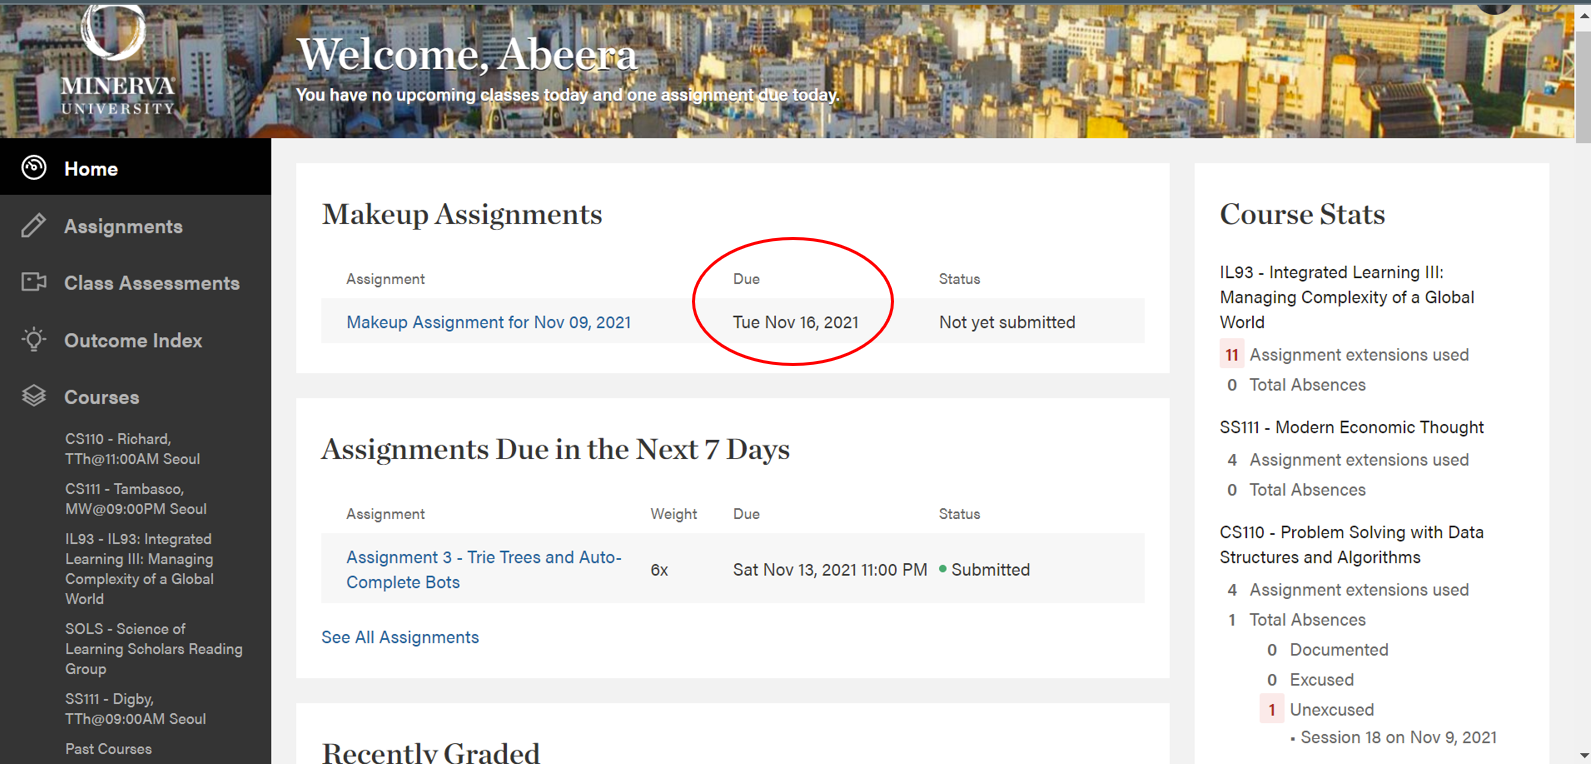

In [158]:
# YOUR Q0 ANSWER HERE

from IPython.display import Image
Image('Dashboard SS.png')

## Overview

Auto-completion functionalities are now ubiquitous in search engines, document editors, and messaging apps. How would you go about developing an algorithmic strategy from scratch to implement these computational solutions? In this assignment, you will learn about a new data structure and use it to build a very simple auto-complete engine. Each question in the assignment guides you closer to that objective while encouraging you to contrast this novel data structure to the other ones we have discussed in class.

A [trie tree](https://en.wikipedia.org/wiki/Trie), or a prefix tree, is a common data structure that stores a set of strings in a collection of nodes so that all strings with a common prefix are found in the same branch of the tree. Each node is associated with a letter, and as you traverse down the tree, you pick up more letters, eventually forming a word. Complete words are commonly found on the leaf nodes. However, some inner nodes can also mark full words.

Let’s use an example diagram to illustrate several important features of tries:

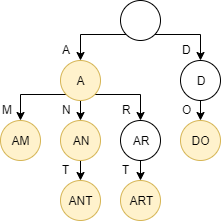

- Nodes that mark valid words are marked in yellow. Notice that while all leaves are considered valid words, only some inner nodes contain valid words, while some remain only prefixes to valid words appearing down the branch.

- The tree does not have to be balanced, and the height of different branches depends on its contents.

- In our implementation, branches never merge to show common suffixes (for example, both ANT and ART end in T, but these nodes are kept separate in their respective branches). However, this is a common first line of memory optimization for tries.

- The first node contains an empty string; it “holds the tree together.”

Your task in this assignment will be to implement a functional trie tree. You will be able to insert words into a dictionary, lookup valid and invalid words, print your dictionary in alphabetical order, and suggest appropriate suffixes like an auto-complete bot.

The assignment questions will guide you through these tasks one by one. To stay safe from breaking your own code, and to reinforce the idea of code versioning, under each new question first **copy your previous (working) code**, and only then **implement the new feature**. The code skeletons provided throughout will make this easier for you at the cost of repeating some large portions of code.

## Q1: Implement a trie tree

In this question, you will write Python code that can take a set/list/tuple of strings and insert them into a trie tree and lookup whether a specific word/string is present in the trie tree.

### Q1a: Theoretical pondering

Two main approaches to building trees, you might recall from class, are making separate Tree and Node classes, or only making a Node class. Which method do you think is a better fit for trie trees, and why? **Justify your reasoning in around 100 words.** You will use your chosen approach throughout the assignment, so don't rush this question.

YOUR ANSWER HERE

Using two classes is a better approach because the primary purpose of classes was to allow for easier and more concise handling of data and this approach allows us to better structure our code by separating the creation of a node and the tree. Moreover, having Tree/node classes means that changes in one class won’t warrant changes in the other, which means that the Tree object can maintain its identity no matter what changes are made to the node object, including have no node at all. 
One class also means including additional operations to maintain the root, which can be problematic as that is how each input will be accessed for insertion or search.  


### Q1b: Practical implementation

In the two cells below, there are two code skeletons. Depending on your answer to Q1a, either **implement a Node and a Trie class** or **implement a Node class**. Choose the corresponding code cell and delete the other one.

For your class(es), write **insert()** and **lookup()** methods, which will insert a word into the trie tree and look it up, respectively. Use the code skeleton and examine the specifications of its docstrings to guide you on the details of inputs and outputs to each method.

If you are coding two classes, your Trie should, upon initiation, create the root Node. If you are coding a single class, use an attribute to mark the root node.

Finally, make sure that the trie can be **initiated with a wordbank as an input**. This means that a user can create a trie and feed it an initial dictionary of words at the same time (like in the tests below), which will be automatically inserted into the trie upon its creation. Likely, this will mean that your \_\_init\_\_() has to make some calls to your insert() method.

Several test cases have been provided for your convenience and these include some, but not all, possible edge cases. If the implementation is correct, your code will pass all the tests. In addition, create at least **three more tests** to demonstrate that your code is working correctly and justify why such test cases are appropriate.

In [159]:
# VERSION 1 - Node + Trie classes

class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        # YOUR CODE HERE
        #initializing the attributes required for the nodes
        
        #the value for each node
        self.char = char          
        self.word_end = False
        
        #the frequency of the node 
        self.counter = 0
        self.children = {}
    
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # YOUR CODE HERE
        self.root = Node("")
        
        #this loop inserts each from the word list into the tree upon initialization
        #the lower function ensures that every word is inserted in lower case to avoid problems with capital letters. 
        for word in word_list:
            self.insert(word.lower())
       
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        # YOUR CODE HERE
        
        #we start from the root so out first node is the root node
        node = self.root
      
        #iterates over the character of each word and checks if the character already exists. If it does, it does not insert 
        #the word more than once. 
        for char in word: 
            if char in node.children: 
                node = node.children[char]
            else: 
                new_node = Node(char)
                node.children[char] = new_node
                node = new_node
        node.word_end = True
        node.counter += 1
                
        
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        # YOUR CODE HERE
        #this reinforces the idea of avoiding problems with capital letters. 
        word = word.lower()
        
        node = self.root
        #searches through the tree by going over each character of the word until the end node is reached.
        for char in word:
            if char in node.children: 
                node = node.children[char]
            else: 
                return False        
            
        return node.word_end 

# Here are several tests that have been created for you.
# Remeber that the question asks you to provide several more,
# as well as to justify them.

# This is Namárië, JRRT's elvish poem written in Quenya
wordbank = """Ai! laurië lantar lassi súrinen, yéni unótimë ve rámar aldaron! Yéni ve lintë yuldar avánier mi oromardi 
lisse-miruvóreva Andúnë pella, Vardo tellumar nu luini yassen tintilar i eleni ómaryo airetári-lírinen. Sí man i yulma nin 
enquantuva? An sí Tintallë Varda Oiolossëo ve fanyar máryat Elentári ortanë, ar ilyë tier undulávë lumbulë; ar 
sindanóriello caita mornië i falmalinnar imbë met, ar hísië untúpa Calaciryo míri oialë. Sí vanwa ná, Rómello vanwa, 
Valimar! Namárië! Nai hiruvalyë Valimar. 
Nai elyë hiruva. Namárië!""".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()

trie = Trie(wordbank)    

    
# be careful about capital letters!
assert trie.lookup('oiolossëo') == True
# this is a prefix, but also a word in itself
assert trie.lookup('an') == True
# this is a prefix, but NOT a word
assert trie.lookup('ele') == False
# not in the wordbank
assert trie.lookup('Mithrandir') == False


# Note: There are several ways in which we can condense the text cleaning syntax, 
# without repeating the method replace() multiple times, 
# but we are leaving it this way for clarity.

In [160]:
# YOUR NEW TESTS HERE

#1
assert trie.lookup('Lantar') == True

#2
assert trie.lookup('lisse-miruvóreva') == True

#3 A common suffix - a group of characters on which several words end but isn't actually a separate word
assert trie.lookup('mar') == False 

YOUR ANSWER HERE

1. In order to truly make the tree not case sensitive, it needs to be able to search for words entered in any format, as long as the characters themselves stay the same. The first test checks for this with a word that start with a capital letter but isn't present like that in the tree. 

2. The dictionary used as the input replaces most special characters except a hyphen ('-'). This tests that each character is assigned to a node and check during lookup. 

3. This test ensures that the function only searches for complete words and not nodes on which words end. 

## Q2: The computational complexity of tries

Evaluate the **computational complexity of the insert() and lookup()** methods in a trie. What are the relevant variables for runtime? You might want to consider how the height of a trie is computed to start addressing this question.  Make sure to clearly explain your reasoning.

**Compare your results to** the runtime of the same operations on **a BST**. Can you think of specific circumstances where the practical runtimes of operations supported by tries are higher than for BSTs? Explain your answer. If you believe such circumstances could be common, why would someone even bother implementing a trie tree?

YOUR ANSWER HERE

The runtime for the creation of a trie tree is directly related to how many words the trie contains and how long these words are. Hence, the worse case running time for creating a trie is O(mn), where m is the length of the longest word and n, the total number of keys in the trie. This describes the time complexity of insert() method that creates the trie. 
The complexity of lookup() will also depend on the length of the word being searched. We have at most 26 comparisons (every node can only have 26 possible children) between each character in the input string and the characters stored in the tree, therefore the runtime is O(26 * k) = O(k), where k is the length of the input string. 

For insertion and lookup, BST perofrms O(log(n) comparisons of keys, where n is the number of characters in the tree because they depends on the depth of the tree. 
Moreover, the worst case running time for these operations in BST is O(m log(n)) (n being the total number of characters and m, the length of the input) while for trie trees it is O(k) (k being the length of the input string). This worst case happens when the tree is heavily unbalanced. This can be quite common in BSTs if words are inputs as it sorts the elements lexicographically where an unbalanced tree can be easy to achieve. 

However, as tries store strings and anything can be stored within strings, if floating point numbers are concerned, using trie trees can lead to long chains and prefixes that aren’t very useful. This can cause the practical runtime of trie trees to be larger than BST. Although, this is a not a very common use of trie trees as they are mostly used for storing a dictionary or for autocomplete operations where words are concerned.  


## Q3: Print a dictionary in alphabetical order.

Recall the meaning of pre-order traversal from your previous classes. On the data structure of a trie tree, pre-order traversal corresponds to an alphabetically sorted list of the words contained within (provided that your node children are sorted alphabetically).

For example, on the example trie given in the introduction, pre-order traversal would return ["A", "AM, "AN", "ANT", "AR, "ART, "D" and "DO"]. However, since we are only interested in the actual words, we would not include "D" and "AR" in our list. To that end, you will need to include an attribute for each node, storing the information about whether its content is a word or not.

Copy your existing code to the code skeleton cell below, and add a new method to it, **alphabetical_list()**. This will be version two of your autocomplete script.

The method should **return a list**, whose elements will be the words contained in the tree, in alphabetical order. On top of passing the provided test, write at least **three more tests**, and explain why they are appropriate.

**Approach choice:** Remember the two possible approaches to the problem, as we’ve seen at the start of the course: iterative or recursive. Depending on your trie implementation, one might be preferred over the other. **Justify your choice of approach** in a few sentences (~100 words).

Copy-paste your previous code and make adjustments to this "new version", so that you cannot break the old one :).

*(Notes: If you choose a recursive approach, it might be useful to implement a helper method that is not called by the user but by preorder_traversal(). Also, watch out for the [unintuitive Python behaviour](https://web.archive.org/web/20200221224620/http://effbot.org/zone/default-values.htm) if defining functions with mutable default parameter values.)*

In [161]:
# depending on your choice of approach,
# add the method either to the Node or the Trie class.

class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        # YOUR CODE HERE
        self.char = char 
            
        self.word_end = False
        self.counter = 0
        self.children = {}
    
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # YOUR CODE HERE
        self.root = Node("")
        
        for word in word_list:
            self.insert(word.lower())
    
        
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        # YOUR CODE HERE
        
        node = self.root
        
      
        for char in word: 
            if char in node.children: 
                node = node.children[char]
            else: 
                new_node = Node(char)
                node.children[char] = new_node
                node = new_node
        node.word_end = True
        node.counter += 1
                
        
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        # YOUR CODE HERE
        word = word.lower()
        node = self.root
        for char in word:
            if char in node.children: 
                node = node.children[char]
            else: 
                return False 
            
            
        return node.word_end 

      
    def traverse(self, root, word, traversed):
        
        """. goes through each node, accounting for where nodes mark the end of the word and stores them all in a list
        
        Parameters
        ----------
        root: node. Changes every time a new node has to be considered as the root
        
        word : str. The word that is being searched over  
        
        traversed: list. The list that contains all the words
            
        Returns
        -------
        traversed: list. List of all the words in the tree
        """
        
        root = root
        
        #checks whether the root has children and then traverses through the branches. It finds the nodes that are marked as 
        #end nodes and for the ones that are prefixes to more words, it adds the missing characters to the prefix to create
        #the full word
        if root.children: 
            for node in root.children:
                new_word = word + node
                
                if root.children[node].word_end == True:
                    traversed.append(new_word)
                
                #recursively calls on itself so that each branch and subbranch is visited. 
                self.traverse(root.children[node], new_word, traversed)
                
        word = ""

        return traversed

    def alphabetical_list(self):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        # YOUR CODE HERE
        
        #we start of by declaring the root of the tree as the starting node.
        root = self.root
        
        #returns a sorted list of the all the words stored in the traversed list.
        return sorted(self.traverse(root, root.char, []))
        
 
    

In [162]:
# intiate the test by uncommenting one of the lines below, depending on your approach

wordbank = """Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Duis pulvinar. Class aptent taciti sociosqu ad litora 
torquent per conubia nostra, per inceptos hymenaeos. Nunc dapibus tortor vel mi dapibus sollicitudin. Etiam quis quam. 
Curabitur ligula sapien, pulvinar a vestibulum quis, facilisis vel sapien.""".replace(",", "").replace(".", "").split()

trie = Trie(wordbank)
# trie = Node(wordbank)

assert trie.alphabetical_list() == ['a','ad','adipiscing','amet','aptent',
                                    'class','consectetuer','conubia',
                                    'curabitur','dapibus','dolor','duis',
                                    'elit','etiam','facilisis','hymenaeos',
                                    'inceptos','ipsum','ligula','litora',
                                    'lorem','mi','nostra','nunc','per',
                                    'pulvinar','quam','quis','sapien',
                                    'sit','sociosqu','sollicitudin','taciti',
                                    'torquent','tortor','vel','vestibulum']

In [163]:
# YOUR NEW TESTS HERE
#1 worst case to test if it can hanlde an input in the reverse alphabetical order 
int_spy = 'alpha, bravo, charlie, delta, echo, foxtort, golf, hotel, india, juliet, kilo, lima, mike, november, oscar, papa, 
quebec, romeo, sierra, tango, uniform, victor, whiskey, xray, yankee, zulu'.replace(",", "").split()
dishevled_spy = reversed(int_spy)
trie = Trie(dishevled_spy)
assert trie.alphabetical_list() == int_spy


#2 list of word with the same prefixes. This esnures that if the function is sorting the word according to each subsequent 
#letter.
pre = 'preoccupation, precipitation, preponderance, precautionary, preproduction, premenopausal, preconception, 
preindustrial'.replace(",", "").split()
pre_sorted = sorted(pre)
trie = Trie(pre)
assert trie.alphabetical_list() == pre_sorted

#3 Repetitions with only the last letter being different. How does the function deal with repetitions. 
#It should not include repeated words as they only exist once in the tree 
r_lst = 'and, ant, anf, ant, ann'.replace(",", "").split()
trie = Trie(r_lst)
sorted_r_lst = sorted(r_lst)
assert trie.alphabetical_list() == ['and', 'anf', 'ann', 'ant']


SyntaxError: EOL while scanning string literal (<ipython-input-163-3f7d7fd04246>, line 3)

YOUR ANSWER HERE
Approach choice: Remember the two possible approaches to the problem, as we’ve seen at the start of the course: iterative or recursive. Depending on your trie implementation, one might be preferred over the other. Justify your choice of approach in a few sentences (~100 words).

I use recursion in my traverse() function because recursion works better when moving through trees. Trees are a collection of objects that are linked to one another, which makes it easier to recursively follow ones branch until we find the value we are looking for. We have a very explicit base case when it comes to trees, which in our code was end nodes. Using recursion also declutters the code and increase #codeReadability by making it to the point and concise.
Moreover, using iteration would be less efficient because it would just be simulating the method of recursion as a while loop would need to be used (we don’t know the number of iterations needed beforehand) where the terminating condition would equal to the base case. 

## Q4: Find the k most common words in a speech.

To mathematically determine the overall connotation of a speech, you might want to compute which words are most frequently used and then run a [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis). To this end, add a method to your code, **k_most_common()** that will take as an input k, an integer, and return a list of the k most common words from the dictionary within the trie. The structure of the output list should be such that each entry is a tuple, the first element being the word and the second an integer of its frequency (see docstring if you’re confused).

To complete this exercise, you don’t have to bother with resolving ties (for example, if k = 1, but there are two most common words with the same frequency, you can return either of them), but consider it an extra challenge and let us know if you believe you managed to solve it.

The test cell below downloads and preprocesses several real-world speeches, and then runs the k-most-common word analysis of them; your code should pass the tests. As usual, add at least **three more tests**, and justify why they are relevant to your code (feel free to find more speeches to start analysing too!).

Again, copy-paste your previous code and make adjustments to this "new version". The first cell has been locked to stop you from accidentally deleting the docstrings.

Completing this question well will help you to tackle Q5!

*(Hint: This task will probably require your nodes to store more information about the frequency of words inserted into the tree. One data structure that might be very useful to tackle the problem of traversing the tree and finding most common words is heaps — you are allowed to use the heapq library or another alternative for this task.)*

In [ ]:
# depending on your choice of approach,
# add the method either to the Node or the Trie class

class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        # YOUR CODE HERE
        self.char = char 
            
        self.word_end = False
        self.counter = 0
        self.children = {}
    
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # YOUR CODE HERE
        self.root = Node("")
        
        for word in word_list:    
            self.insert(word.lower())
           
    
        
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        # YOUR CODE HERE
        
        node = self.root
        
      
        for char in word: 
            if char in node.children: 
                node = node.children[char]
            else: 
                new_node = Node(char)
                node.children[char] = new_node
                node = new_node
        node.word_end = True
        node.counter += 1
                
        
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        # YOUR CODE HERE
        word = word.lower()
        node = self.root
        for char in word:
            if char in node.children: 
                node = node.children[char]
            else: 
                return False 
            
            
        return node.word_end 
    
    
    def traverse_frequency(self, root, word, frequency):
        """. goes through each node, accounting for where nodes mark the end of the word and stores them all in a list
        along with the frequency of the end node to account for how many times the word was inserted in the tree
        
        Parameters
        ----------
        root: node. Changes every time a new node has to be considered as the root
        
        word : str. The word that is being searched over  
        
        frequency: list with tuples. Each tuple contains the word and the number of times it was inserted in the tree
            
        Returns
        -------
        frequency: list with tuples. All the words inserted in the tree and thier frequencies 
        """
        
        
        root = root
        if root.children: 
            for node in root.children:
                new_word = word + node
                
                if root.children[node].word_end == True:
                    
                    #we change this part so we can append a tuple containing the word and its frequency
                    frequency.append((new_word, root.children[node].counter))
                    
                self.traverse_frequency(root.children[node], new_word, frequency)
                
        word = ""

        return frequency
            
    
    def k_most_common(self, k):
        """Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.

        Example
        -------
        >>> print(trie.k_most_common(3))
        [(‘the’, 154), (‘a’, 122), (‘i’, 122)]
        
        I.e. the word ‘the’ has appeared 154 times in the inserted text.
        The second and third most common words both appeared 122 times.
        """
        # YOUR CODE HERE
        root = self.root
        
        a = self.traverse_frequency(root, root.char, [])
        
        #we sort the frequency list according to two criterias as it contains a tuple instead of single elements
        #we sort it numerically in an ascending order so it can give us the largest values first
        #and we sorted it alphabetically so that we can resolve any ties for words with the same frequency 
        a.sort(key = lambda x: x[0])
        a.sort(key = lambda x: x[1], reverse = True)
        
        #we return the elements till our desired value k 
        return a[:k]
        

In [ ]:
pip install requests

In [ ]:
# depending on your choice of approach, 
# uncomment one of the lines in the for loop to initiate the test

# you might have to run 'pip install requests' before running this cell 
# since you're downloading data from an online resource 
# please note this might take a while to run

# Mehreen Faruqi - Black Lives Matter in Australia: https://bit.ly/CS110-Faruqi
# John F. Kennedy - The decision to go to the Moon: https://bit.ly/CS110-Kennedy
# Martin Luther King Jr. - I have a dream: https://bit.ly/CS110-King
# Greta Thunberg - UN Climate Summit message: https://bit.ly/CS110-Thunberg
# Vaclav Havel - Address to US Congress after the fall of Soviet Union: https://bit.ly/CS110-Havel

from requests import get
speakers = ['Faruqi', 'Kennedy', 'King', 'Thunberg', 'Havel']
bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-']

for speaker in speakers:
    
    # download and clean up the speech from extra characters
    speech_full = get(f'https://bit.ly/CS110-{speaker}').text
    just_text = ''.join(c for c in speech_full if c not in bad_chars)
    without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
    just_words = [word for word in without_newlines.split(" ") if word != ""]
    
    trie = Trie(just_words)
    # trie = Node(just_words)
    
    if speaker == 'Faruqi':
        Faruqi = [('the', 60), ('and', 45), ('to', 39), ('in', 37), 
                  ('of', 34), ('is', 25), ('that', 22), ('this', 21), 
                  ('a', 20), ('people', 20), ('has', 14), ('are', 13), 
                  ('for', 13), ('we', 13), ('have', 12), ('racism', 12), 
                  ('black', 11), ('justice', 9), ('lives', 9), ('police', 9)]
        assert trie.k_most_common(20) == Faruqi
    
    elif speaker == 'Kennedy':
        Kennedy = [('the', 117), ('and', 109), ('of', 93), ('to', 63), 
                   ('this', 44), ('in', 43), ('we', 43), ('a', 39), 
                   ('be', 30), ('for', 27), ('that', 27), ('as', 26), 
                   ('it', 24), ('will', 24), ('new', 22), ('space', 22), 
                   ('is', 21), ('all', 15), ('are', 15), ('have', 15), ('our', 15)]
        assert trie.k_most_common(21) == Kennedy
    
    elif speaker == 'Havel':
        Havel = [('the', 34), ('of', 23), ('and', 20), ('to', 15), 
                 ('in', 13), ('a', 12), ('that', 12), ('are', 9), 
                 ('we', 9), ('have', 8), ('human', 8), ('is', 8), 
                 ('you', 8), ('as', 7), ('for', 7), ('has', 7), ('this', 7), 
                 ('be', 6), ('it', 6), ('my', 6), ('our', 6), ('world', 6)]
        assert trie.k_most_common(22) == Havel
    
    elif speaker == 'King':
        King = [('the', 103), ('of', 99), ('to', 59), ('and', 54), ('a', 37), 
                ('be', 33), ('we', 29), ('will', 27), ('that', 24), ('is', 23), 
                ('in', 22), ('as', 20), ('freedom', 20), ('this', 20), 
                ('from', 18), ('have', 17), ('our', 17), ('with', 16), 
                ('i', 15), ('let', 13), ('negro', 13), ('not', 13), ('one', 13)]
        assert trie.k_most_common(23) == King
    
    elif speaker == 'Thunberg':
        Thunbger = [('you', 22), ('the', 20), ('and', 16), ('of', 15), 
                    ('to', 14), ('are', 10), ('is', 9), ('that', 9), 
                    ('be', 8), ('not', 7), ('with', 7), ('i', 6), 
                    ('in', 6), ('us', 6), ('a', 5), ('how', 5), ('on', 5), 
                    ('we', 5), ('all', 4), ('dare', 4), ('here', 4), 
                    ('my', 4), ('people', 4), ('will', 4)]
        assert trie.k_most_common(24) == Thunbger
        
# Note: There are cleaner and more concise ways to write the code above, 
# but this way it should be easily understandable.

In [ ]:
for speaker in speakers:
    
    # download and clean up the speech from extra characters
    speech_full = get(f'https://bit.ly/CS110-{speaker}').text
    just_text = ''.join(c for c in speech_full if c not in bad_chars)
    without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
    just_words = [word for word in without_newlines.split(" ") if word != ""]
    
    trie = Trie(just_words)
    # trie = Node(just_words)

#1 testing to see if the function outputs an empty list if 0 most common words are asked for.     
    if speaker == 'Faruqi':
        Faruqi = []
        assert trie.k_most_common(0) == Faruqi

#2 this is a very large output to test if the code can handle very large inputs        
    elif speaker == 'King':
        King = [('the', 103), ('of', 99), ('to', 59), ('and', 54), ('a', 37), ('be', 33), ('we', 29), ('will', 27), ('that', 24)
                , ('is', 23), ('in', 22), ('as', 20), ('freedom', 20), ('this', 20), ('from', 18), ('have', 17), ('our', 17), 
                ('with', 16), ('i', 15), ('let', 13), ('negro', 13), ('not', 13), ('one', 13), ('day', 12), ('ring', 12), 
                ('dream', 11), ('come', 10), ('every', 10), ('nation', 10), ('back', 9), ('for', 9), ('go', 9), ('today', 9), 
                ('able', 8), ('are', 8), ('by', 8), ('justice', 8), ('must', 8), ('satisfied', 8), ('their', 8), ('you', 8), 
                ('all', 7), ('together', 7), ('when', 7), ('but', 6), ('cannot', 6), ('it', 6), ('long', 6), ('men', 6), 
                ('now', 6), ('there', 6), ('white', 6), ('america', 5), ('check', 5), ('children', 5), ('faith', 5), 
                ('free', 5), ('great', 5), ('has', 5), ('my', 5), ('new', 5), ('on', 5), ('shall', 5), ('time', 5), ('which', 5)
                , ('years', 5), ('american', 4), ('an', 4), ('at', 4), ('black', 4), ('can', 4), ('down', 4), ('hope', 4), 
                ('hundred', 4), ('into', 4), ('land', 4), ('later', 4), ('mississippi', 4), ('mountain', 4), ('so', 4), 
                ('still', 4), ('until', 4), ('up', 4), ('us', 4), ('who', 4), ('alabama', 3), ('brotherhood', 3), ('georgia', 3)
                , ("god's", 3), ('here', 3), ('his', 3), ('injustice', 3), ('its', 3), ('join', 3), ('last', 3), ('little', 3), 
                ('made', 3), ('make', 3), ('never', 3), ('no', 3)]
        assert trie.k_most_common(100) == King
        
#3 the k used here is too large that these many words don't exist in the speech itself. This input ensure that the entire
# speech is outputted for very large numbers not within the bounds
    elif speaker == 'Thunberg':
        Thunbger = [('you', 22), ('the', 20), ('and', 16), ('of', 15), ('to', 14), ('are', 10), ('is', 9), ('that', 9), 
                    ('be', 8), ('not', 7), ('with', 7), ('i', 6), ('in', 6), ('us', 6), ('a', 5), ('how', 5), ('on', 5), 
                    ('we', 5), ('all', 4), ('dare', 4), ('here', 4), ('my', 4), ('people', 4), ('will', 4), ('but', 3), 
                    ('co2', 3), ('have', 3), ('it', 3), ('or', 3), ('solutions', 3), ('still', 3), ('than', 3), ('this', 3), 
                    ('years', 3), ('your', 3), ('15', 2), ('50%', 2), ('acceptable', 2), ('air', 2), ('away', 2), ('back', 2), 
                    ('because', 2), ('believe', 2), ('below', 2), ('by', 2), ('can', 2), ('chance', 2), ('change', 2), 
                    ('climate', 2), ('come', 2), ('degrees', 2), ('do', 2), ('emissions', 2), ('enough', 2), ('failing', 2), 
                    ('for', 2), ('gigatons', 2), ('if', 2), ('less', 2), ('like', 2), ('line', 2), ('numbers', 2), ('right', 2),
                    ('risk', 2), ('say', 2), ('staying', 2), ('these', 2), ('today', 2), ('understand', 2), ('up', 2), 
                    ('world', 2), ('yet', 2), ('young', 2), ("'business", 1), ('1/2', 1), ('10', 1), ('1st', 1), ('2018', 1), 
                    ('30', 1), ('350', 1), ('420', 1), ('67%', 1), ('8', 1), ('about', 1), ('act', 1), ('additional', 1), 
                    ('already', 1), ('also', 1), ('am', 1), ('angry', 1), ('any', 1), ('as', 1), ('aspects', 1), ('barely', 1), 
                    ('been', 1), ('beginning', 1), ('best', 1), ('betrayal', 1), ('beyond', 1), ('billions', 1), ('budget', 1), 
                    ('celsius', 1), ('chain', 1), ('childhood', 1), ('choose', 1), ('clear', 1), ('collapsing', 1), 
                    ('coming', 1), ('consequences', 1), ('continue', 1), ('control', 1), ('crystal', 1), ('cutting', 1), 
                    ('doing', 1), ('down', 1), ('draw', 1), ('dreams', 1), ('dying', 1), ('economic', 1), ('ecosystems', 1), 
                    ('emit', 1), ('empty', 1), ('entire', 1), ('entirely', 1), ('equity', 1), ('eternal', 1), ('evil', 1), 
                    ('exist', 1), ('extinction', 1), ('eyes', 1), ('fail', 1), ('fairy', 1), ('feedback', 1), ('fifty', 1), 
                    ('figure', 1), ('figures', 1), ('forgive', 1), ('future', 1), ('generation', 1), ('generations', 1), 
                    ('get', 1), ('given', 1), ('gives', 1), ('global', 1), ('gone', 1), ('growth', 1), ('had', 1), ('half', 1),
                    ('has', 1), ('hear', 1), ('hidden', 1), ('hope', 1), ('human', 1), ('hundreds', 1), ("i'm", 1), ('idea', 1),
                    ('include', 1), ('intergovernmental', 1), ('irreversible', 1), ('jan', 1), ('just', 1), ('justice', 1), 
                    ('kept', 1), ('left', 1), ('let', 1), ('levels', 1), ('live', 1), ('look', 1), ('loops', 1), ('lucky', 1), 
                    ('mass', 1), ('matter', 1), ('mature', 1), ('may', 1), ('message', 1), ('money', 1), ('more', 1), 
                    ('most', 1), ('needed', 1), ('never', 1), ('no', 1), ('now', 1), ('nowhere', 1), ('ocean', 1), ('odds', 1),
                    ('off', 1), ('one', 1), ('ones', 1), ('only', 1), ('other', 1), ('our', 1), ('out', 1), ('panel', 1), 
                    ('percent', 1), ('plans', 1), ('points', 1), ('politics', 1), ('pollution', 1), ('popular', 1), 
                    ('presented', 1), ('pretend', 1), ('reactions', 1), ('really', 1), ('refuse', 1), ('rely', 1), 
                    ('remaining', 1), ('rise', 1), ('sad', 1), ('saying', 1), ('school', 1), ('science', 1), ('setting', 1), 
                    ('should', 1), ("shouldn't", 1), ('side', 1), ('sight', 1), ('simply', 1), ('situation', 1), ('so', 1), 
                    ('solved', 1), ('some', 1), ('starting', 1), ('stolen', 1), ('sucking', 1), ('suffering', 1), ('tales', 1),
                    ('talk', 1), ('technical', 1), ('technologies', 1), ('tell', 1), ('temperature', 1), ('thank', 1), 
                    ('then', 1), ('there', 1), ('they', 1), ('those', 1), ('tipping', 1), ("today's", 1), ('tons', 1), 
                    ('too', 1), ('toxic', 1), ('uncomfortable', 1), ('understood', 1), ('upon', 1), ('urgency', 1), 
                    ("usual'", 1), ('waking', 1), ('want', 1), ('warming', 1), ('watching', 1), ("we'll", 1), ('when', 1), 
                    ('where', 1), ('whether', 1), ('who', 1), ('within', 1), ('words', 1), ('would', 1), ('wrong', 1), 
                    ("you're", 1), ('—', 1)]
        assert trie.k_most_common(500000) == Thunbger



YOUR ANSWER HERE

## Q5: Implement an autocomplete with a Shakespearean dictionary!

Your task is to create a new **autocomplete()** method for your class, which will take a string as an input, and return another string as an output. If the string is not present in the tree, the output will be the same as the input. However, if the string is present in the tree, your task is to find the most common word to which it is a prefix and return that word instead (this can still turn out to be itself).

To make the task more interesting, use the test cell code to download and parse “The Complete Works of William Shakespeare”, and insert them into a trie. Your autocomplete should then pass the following tests. As usual, add at least **three more test cases**, and explain why they are appropriate (you can use input other than Shakespeare for them).

Make sure to include a minimum **100 word-summary critically evaluating** your autocomplete engine. How does it really work? Your critical reflection needs to specifically evaluate the role of the different data structures used by their algorithm and what is the overall complexity that the algorithm offers. Can we do better? If so, how and by how much?

*(Hint: Again, depending on how you choose to implement it, your autocomplete() might make calls to other helper methods. However, make sure that autocomplete() is the method exposed to the user in order to pass the tests.)*

*This is a thoroughly frequentist approach to the problem, which is not the only method, and in many cases not the ideal method. However, if you were tasked with implementing something like [this](https://jqueryui.com/autocomplete/) or [this](https://xdsoft.net/jqplugins/autocomplete/), it might just be enough, so let’s give it a go. Good luck!*

In [ ]:
# depending on your choice of approach, 
# add this method to your Node or Trie class

# depending on your choice of approach,
# add the method either to the Node or the Trie class

class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        # YOUR CODE HERE
        self.char = char 
            
        self.word_end = False
        self.counter = 0
        self.children = {}
    
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # YOUR CODE HERE
        self.root = Node("")
        
        for word in word_list:    
            self.insert(word.lower())
           
    
        
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        # YOUR CODE HERE
        
        node = self.root
        
      
        for char in word: 
            if char in node.children: 
                node = node.children[char]
            else: 
                new_node = Node(char)
                node.children[char] = new_node
                node = new_node
        node.word_end = True
        node.counter += 1
                
        
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        # YOUR CODE HERE
        word = word.lower()
        node = self.root
        for char in word:
            if char in node.children: 
                node = node.children[char]
            else: 
                return False 
            
            
        return node.word_end 
    
    
    def traverse_frequency(self, root, word, frequency):
        """. goes through each node, accounting for where nodes mark the end of the word and stores them all in a list
        along with the frequency of the end node to account for how many times the word was inserted in the tree
        
        Parameters
        ----------
        root: node. Changes every time a new node has to be considered as the root
        
        word : str. The word that is being searched over  
        
        frequency: list with tuples. Each tuple contains the word and the number of times it was inserted in the tree
            
        Returns
        -------
        frequency: list with tuples. All the words inserted in the tree and thier frequencies 
        """
        root = root
        if root.children: 
            for node in root.children:
                new_word = word + node
                
                if root.children[node].word_end == True:
                    frequency.append((new_word, root.children[node].counter))
                    
                self.traverse_frequency(root.children[node], new_word, frequency)
                
        word = ""

        return frequency
            
    
    def k_most_common(self, k):
        """Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.

        Example
        -------
        >>> print(trie.k_most_common(3))
        [(‘the’, 154), (‘a’, 122), (‘i’, 122)]
        
        I.e. the word ‘the’ has appeared 154 times in the inserted text.
        The second and third most common words both appeared 122 times.
        """
        # YOUR CODE HERE
        root = self.root 
        a = self.traverse_frequency(root, root.char, [])
        a.sort(key = lambda x: x[0])
        a.sort(key = lambda x: x[1], reverse = True)
        return a[:k]
        


    def autocomplete(self, prefix):
        """Finds the most common word with the given prefix.

        You might want to reuse some functionality or ideas from Q4.

        Parameters
        ----------
        prefix : str
            The word part to be “autocompleted”.

        Returns
        ----------
        str
            The complete, most common word with the given prefix.
            
        Notes
        ----------
        The return value is equal to prefix if there is no valid word in the trie.
        The return value is also equal to prefix if prefix is the most common word.
        """
        # YOUR CODE HERE
        node = self.root 
     
        # a condition for an empty input 
        if prefix == '':
            return prefix
        
        #iterates over every character of the prefix to evaluate if the prefix exists in the tree or not. 
        #if it does, the node we consider is the last node of the prefix 
        #if it does not, the input is used as the output. 
        for char in prefix:
            if char in node.children:
                node = node.children[char]
            else:
                return prefix
        
        #we start of with a tuple with the prefix and its frequency
        suggestions = [(prefix, node.counter)]
        
        #we call the traverse_frequency function to account for all the words with the prefix and their frequencies 
        result = self.traverse_frequency(node, prefix, suggestions)
        
        #sorting the list of words and thier frequencies according to the frequencies. 
        result.sort(key = lambda x:x[1], reverse = True)
        
        #the word with the highest frequency is returned. 
        return result[0][0]
        

In [ ]:
# depending on your choice of approach, uncomment one of the lines below
# The Complete Works of William Shakespeare is a LARGE book, 
# so the code might take a while to run

from requests import get
bad_chars = [';', ',', '.', '?', '!', '1', '2', '3', '4',
             '5', '6', '7', '8', '9', '0', '_','[', ']']

SH_full = get('http://bit.ly/CS110-Shakespeare').text
SH_just_text = ''.join(c for c in SH_full if c not in bad_chars)
SH_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in SH_just_text)
SH_just_words = [word for word in SH_without_newlines.split(" ") if word != ""]

SH_trie = Trie(SH_just_words)
# SH_trie = Node(SH_just_words)

assert SH_trie.autocomplete('hist') == 'history'
assert SH_trie.autocomplete('en') == 'enter'
assert SH_trie.autocomplete('cae') == 'caesar'
assert SH_trie.autocomplete('gen') == 'gentleman'
assert SH_trie.autocomplete('pen') == 'pen'
assert SH_trie.autocomplete('tho') == 'thou'
assert SH_trie.autocomplete('pent') == 'pentapolis'
assert SH_trie.autocomplete('petr') == 'petruchio'

In [ ]:
# YOUR NEW TESTS HERE

#1 rnd is not present in the input list. This ensures that if a word that is not present is used as a prefix, it is what is outputted
assert SH_trie.autocomplete('rnd') == 'rnd'

#2 an empty string is a special case which should return itself because the root value does not count as being present in the input string
assert SH_trie.autocomplete('') == ''

#3 the is the most common 
assert SH_trie.autocomplete('t') == 'the'


YOUR ANSWER HERE

The autocomplete function aims to produce the most common word associated with the given prefix. It works by traversing through the tree and searching down the branch that starts with the given prefix. For every node that is marked by an ‘end point’ within the tree, it counts that as a potential word connected to that prefix and records its frequency (node.counter). To do this, the function calls to another function that performs a pre-order traversal on the tree (root, left, right). 
To understand this implementation lets take an example. If the prefix ‘en’ is given, the function will first search if the prefix is present, if it is not, it returns the prefix. If the prefix is present, it starts down the branch looking for words: E-N-D , at the node D it will find that D marks the end of a word so it records the word and the amount of times it was inserted in tree. 

Using a trie tree alone for autocompletion gives us the time complexity of O(26 * k) = O(k) where k is the length of the longest word with that prefixes, as we only search down one branch associated with that prefix. We use sorted() function to sort through our frequency of words to find the most common word associated with the prefix. Python’s sorted() function uses Timsort, which has an average running time of O(n log n), while the best case is O(n)
In comparison, using a heapq will have a time complexity of:

Insertion: O(1) + O(H) = O(H) and since the height = O(log N) where N is the total number of nodes. And since we need to add the frequency of every word associated with the given prefix to find the max, we have the time complexity for building the heap = O(n log N)  

And the time complexity for retrieving the maximum value from the heap = O(1), which gives us a total time complexity of: T(n) = O(1) + O(n log n), which is basically T(n) = O(n log n).

When comparing the two complexities, two don’t perform much differently on the average but heapq does take an extra O(n) space and is harder to implement within the function as compared to sorted(). However, sorted() seems to work very well for the length of words we had for our test cases, but it could perform worse for very large inputs. In that case, we might want to use heap1 instead as it provides us a more organized way to store our data. 



## HC appendix 

#gapanalysis: writing the functions for this assignment required me to research a lot about trie trees and how different operations were implemented. The internet is filled with resources to understand the concept (existing solutions) but the novel inputs given to us in the assignment (for example a list of words instead of a single word for insertion) required to find new approaches to understanding trie trees and its operations (novel solutions). 

#critique: I use critique at several points in the assignment, when evaluating which format of classes to use, to argue for my choice of using recursion and when critically evaluating the autocomplete() function. I also use a standard for comparisons between different choice in order to justify the choice, for example using complexity analysis to justify the use of sorted() instead of heapq. 

#designthinking: I use the iterative process of design thinking to come up with working code for each problem. I first defined the problem for myself, the requirements, the constraints, and ideated by trying to understand different approaches to the problem and then came up with a draft code which I fixed up according to the errors I received from each test. This process allowed me to fix my code and make it applicable across several inputs.  

